## Step 1: Import necessary libraries

In [12]:

# Packages needed generally
import matplotlib.pyplot as plt
#from cartopy import crs as ccrs, feature as cfeature
import xarray as xr
import pandas as pd
import numpy as np
from rasterio import mask

# Packages needed for CESM1 example
import pprint
import intake
import requests
import aiohttp
import s3fs

# Packages needed for CMIP6
import zarr
import gcsfs

ModuleNotFoundError: No module named 'rasterio'

## Step 2: Data access

In [ ]:
# Open original collection description file: CESM1 LENS
cat_url = "https://ncar-cesm-lens.s3-us-west-2.amazonaws.com/catalogs/aws-cesm1-le.json"
col = intake.open_esm_datastore(cat_url)
col

# Location of file containing grid (lat/lon) information for CESM1 LENS
grid_url="s3://ncar-cesm-lens/ocn/static/grid.zarr"

## Step 3: Subset data to regoin of interest

In [ ]:
# Search for the sea surface variable, display the first few entries in the resulting data frame
col.search(variable="SST").df

In [ ]:
# Get more detailed: search for monthly output for the 20th century and RCP8.5 
# ("HIST" is the 1850-1919 period, which is only in the first ensemble member, and "20C" is 1920-2005 which is common across all the other members)
col_ocntemp = col.search(
    frequency=["monthly"],
    component="ocn",
    variable="SST",
    experiment=["20C", "RCP85"],  
)

col_ocntemp.df

In [2]:
# Load catalog entries for subset into a dictionary of xarray datasets
dsets = col_ocntemp.to_dataset_dict(
    zarr_kwargs={"consolidated": True}, storage_options={"anon": True}
)
print(f"\nDataset dictionary keys:\n {dsets.keys()}")

NameError: name 'col_ocntemp' is not defined

In [3]:
# Get file containing lat/lon grid information: s3://ncar-cesm-lens/ocn/static/grid.zarr
fs = s3fs.S3FileSystem(anon=True)
grid = xr.open_zarr(fs.get_mapper(grid_url), consolidated=True) #we need to mess with this to get coordinates for channel islands
#grid.z_t.plot.scatter() #for vertical profile
grid

NameError: name 's3fs' is not defined

In [4]:
# Define Xarray datasets corresponding to the three experiments
ds_20C = dsets["ocn.20C.monthly"]
ds_RCP85 = dsets["ocn.RCP85.monthly"]

#look at ds_20C dataset
ds_20C

NameError: name 'dsets' is not defined

## Step 4: Mapping subset data

In [5]:

#this is mapping the whole world. code chunk runs a long time but is here to check if it is working correctly

# take mean of the `member_id` dimensions
ds_20C_mean=ds_20C.mean(dim="member_id")

#zoom into SST variable and slice for years between 1950 to 2000
test_2 = ds_20C_mean.SST.sel(time=slice("1950", "2000"))

#slice even more to just a certain year stated
test_1950_2 = test_2.sel(time='1950-03')
test_2000_2 = test_2.sel(time='2000-03')

#plot the graph on the map
test_1950_2.squeeze().plot()

NameError: name 'ds_20C' is not defined

In [6]:
#slicing the nlat and nlon to subset for a certain part on the map
ds_20C_ch = ds_20C.isel(nlat=slice(240,330), nlon=slice(220,260))
ds_20C_ch

NameError: name 'ds_20C' is not defined

In [7]:
#for 1920 to 2000
ds_20C_ch_mean = ds_20C_ch.mean(dim="member_id")
#see what is in this x array
ds_20C_ch_mean

NameError: name 'ds_20C_ch' is not defined

In [8]:
#slice for times between 1950 to 2000
#ds_20C_ch_mean = ds_20C_ch_mean.SST.sel(time=slice("1950", "2000")) #took out SST
#ds_20C_ch_mean

ds_20C_ch = ds_20C.SST.sel(time=slice("1950", "2000")) #took out SST
ds_20C_ch

NameError: name 'ds_20C' is not defined

In [9]:
regbox=[-40,40,90,300]
# Read in specified region
mask_lon = (ds_20C_ch.lon >= regbox[2]) & (ds_20C_ch.lon <= regbox[3])
mask_lat = (ds_20C_ch.lat >= regbox[0]) & (ds_20C_ch.lat <= regbox[1])
sst=mytos.where(mask_lon & mask_lat, drop=True).squeeze()

NameError: name 'ds_20C_ch' is not defined

In [10]:
#slice for just 1950-03
test_1950 = ds_20C_ch_mean.sel(time='1950')
test_2000 = ds_20C_ch_mean.sel(time='2000-03')
test_1950.plot()


NameError: name 'ds_20C_ch_mean' is not defined

NameError: name 'test_1950' is not defined

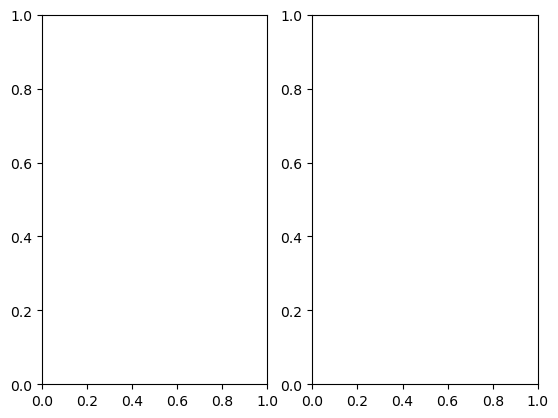

In [11]:
fig, axs = plt.subplots(ncols=2)

axs

test_1950.plot(ax=axs[0])

test_1950.plot.hist(ax=axs[1])

plt.tight_layout()

plt.draw()